# Testing serial port (USB) Speed
Using one of the called USB-TTL such as FTDI FT232RL, the Silicon Labs CP2102, the Prolific Technologies PL2303HX and the CH340G used here.

Setting the port in 8N1, comes in a 10 bauds/byte (1 start, 8 payload, 1 stop)
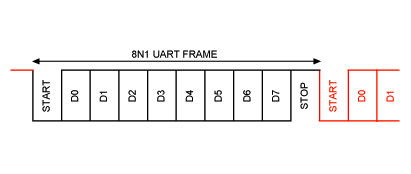

## Setting LibSerial
For the test we use the following config:
```c
SerialStream serialStream(SERIAL_PORT,
                  BaudRate::BAUD_2000000,
                  CharacterSize::CHAR_SIZE_8,
                  FlowControl::FLOW_CONTROL_NONE,
                  Parity::PARITY_NONE,
                  StopBits::STOP_BITS_1) ;
```

## USB serial Device
The device's Datasheet state a max speed of 2 MHz -> 2 MBauds.

The expected bit rate is **200 kB/s.** (2 MBauds / 10)

And we use a `01010101` pulse train pattern.
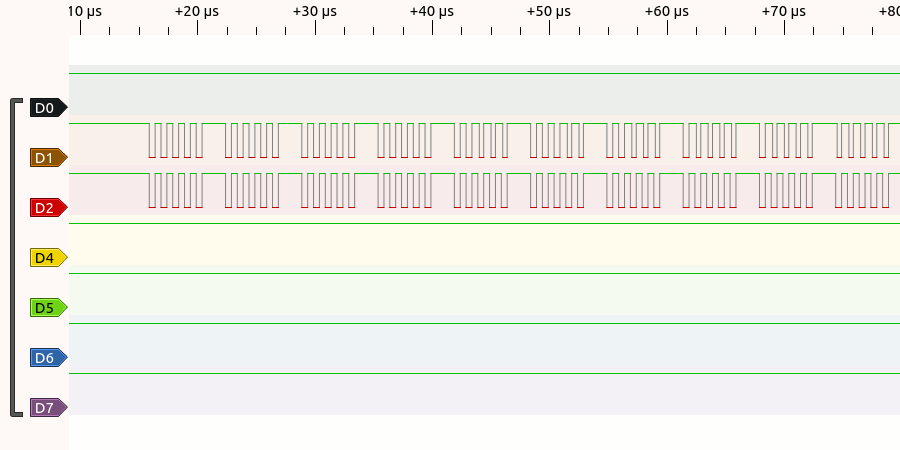

## Logic analyzer measurement (Pulseview)
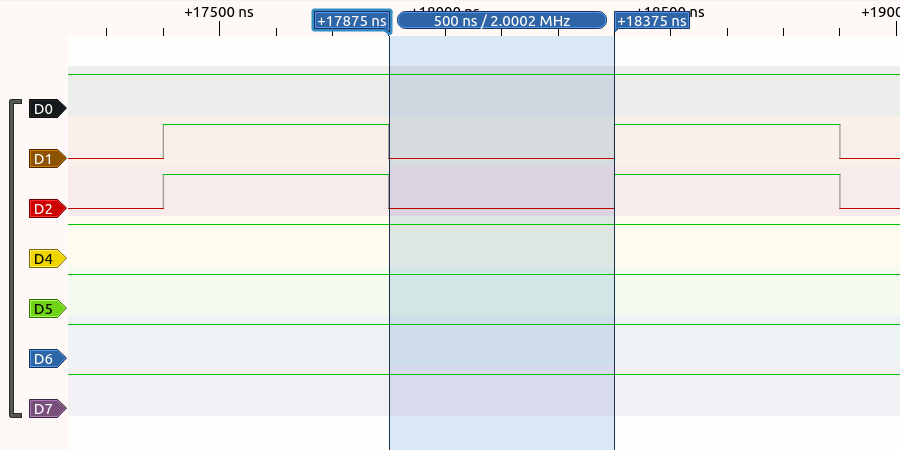
As expected **1 bit -> 500 ns (2 MHz)** 

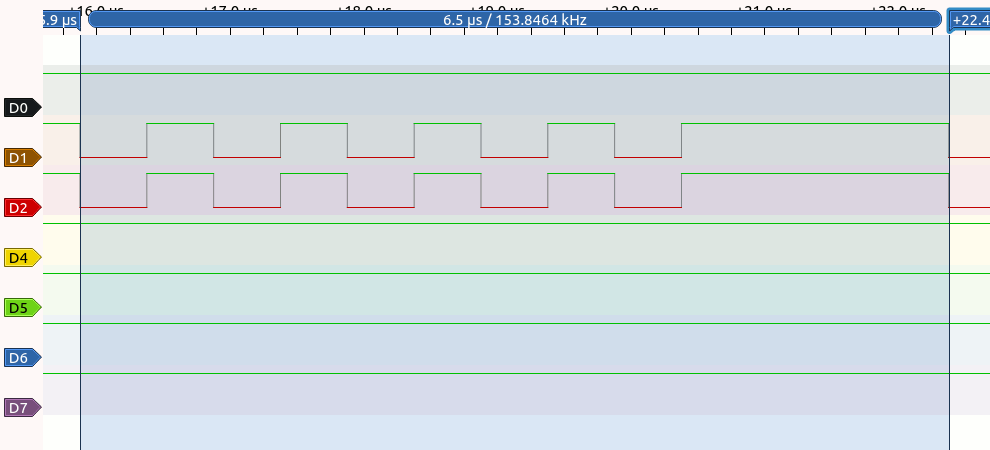
1 word (8 bits). **1 Byte / 6.5 us = 153.8464 kB/s**

Below the 200 kB/s expected.

## The gap problem
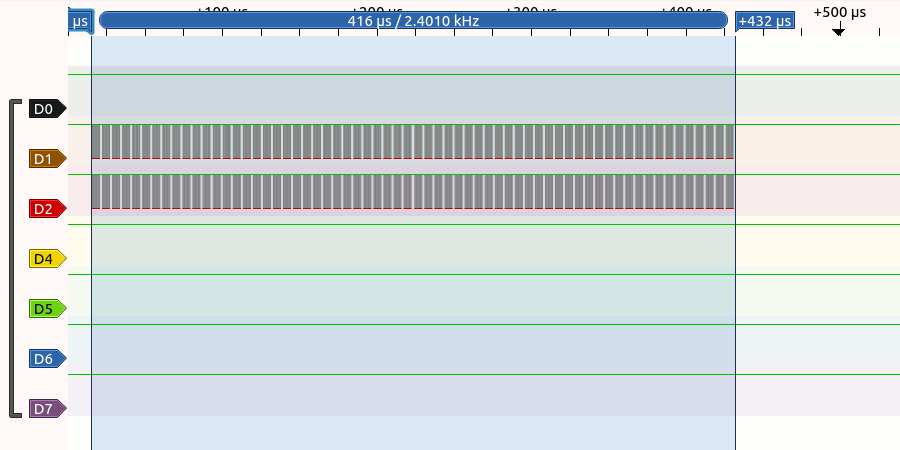
The image shows a gap after 64 words.

without taking count the gap we have:

** 64 Bytes * 2,4 kHz = 153,6 kB/s **

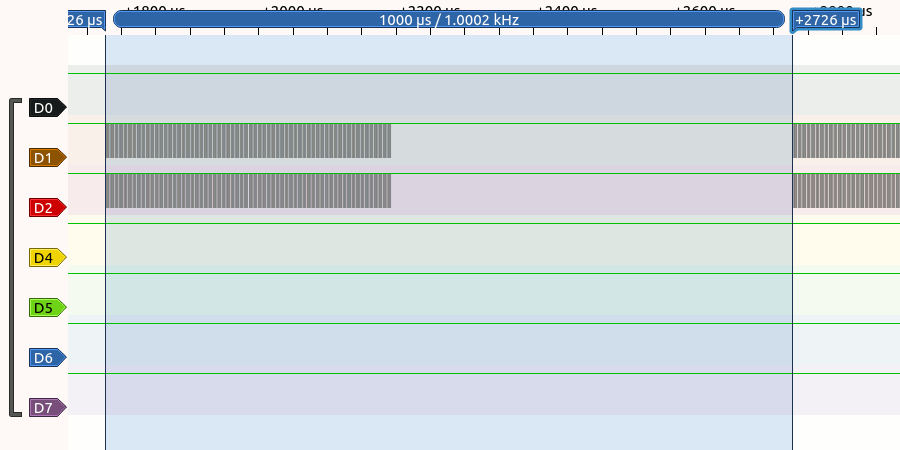
With the gap the bit rate is reduced to:

** 64 Bytes * 1 kHz = 64 kB/s **

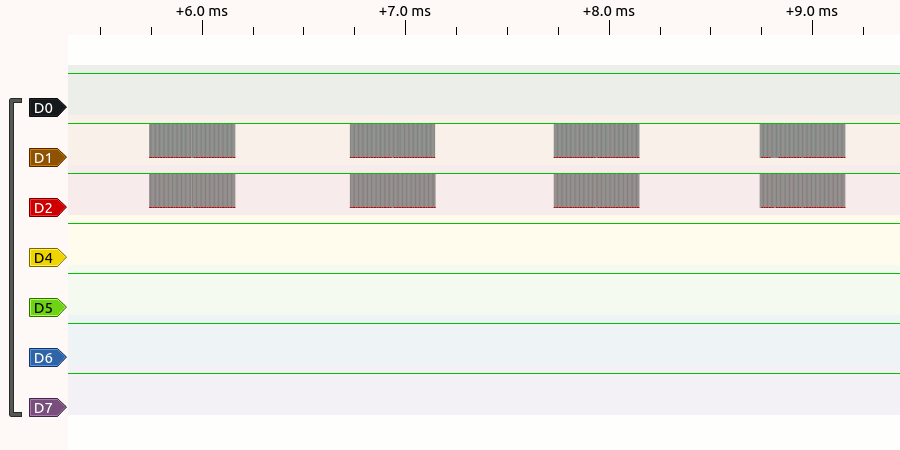
We have a 64 bytes burst communication.